[Scraping avec Python : Formation Complète 2024](https://www.youtube.com/watch?v=sOAZpHDEdkg)

À vous de jouer ! - 00:55:00

Date : 17-02-24

In [1]:
import requests
from bs4 import BeautifulSoup
import pprint

In [2]:
url = 'https://books.toscrape.com/'

In [3]:
# Récupération des données de l'url
response = requests.get(url)

In [11]:
# Récupération du contenu du texte dans un fichier html afin de conserver
# les données de la page @ qui seraient éventuellements modifiées à l'avenir
with open('results/index.html', 'w') as f:
    f.write(response.text)

In [12]:
# Récupération des données du fichier html sauvegardé ci-avant sur le contenu
# de la page @ ciblée
with open('results/index.html', 'r') as f:
    html = f.read()

In [13]:
# Instanciation du contenu du texte du fichier html récupéré ci-avant
soup = BeautifulSoup(html, 'html.parser')

### Récupération les titres de toutes les images de la page d'accueil - 1ère méthode

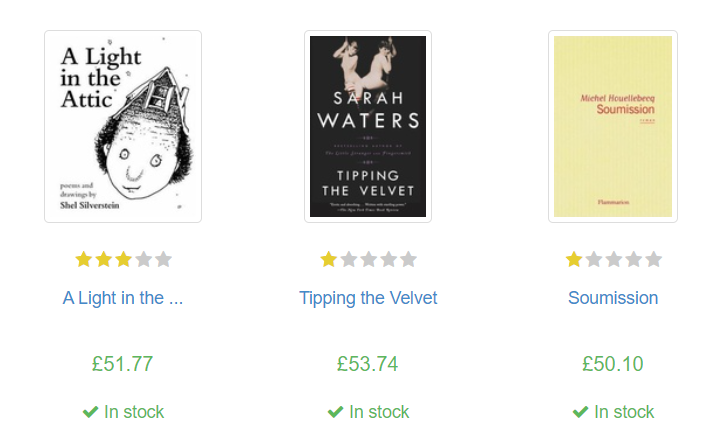

Par risque où évenntuellement la page @ serait modifiée avec l'insertion à titre d'exemple d'un logo, et donc par l'insertion d'une nouvelle balise "img" récupération de toutes les données comprises dans la balise "<section>"

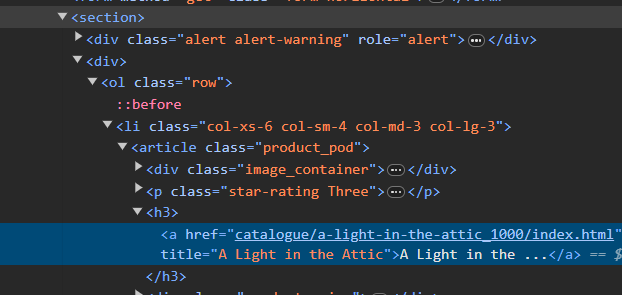

In [20]:
# Récupération à partir balise 'article' - classe div : product_pod
articles = soup.find_all('article', class_='product_pod')
articles

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

In [21]:
# Boucle pour récupérer les balises commençant par 'a' :
# Chaque liste dispose de 2 composants
for article in articles:
    print(article.find_all('a'))

[<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>, <a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>]
[<a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/></a>, <a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a>]
[<a href="catalogue/soumission_998/index.html"><img alt="Soumission" class="thumbnail" src="media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg"/></a>, <a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a>]
[<a href="catalogue/sharp-objects_997/index.html"><img alt="Sharp Objects" class="thumbnail" src="media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"/></a>, <a href="catalogue/sharp-objects_997/inde

In [37]:
# Compréhensino de liste pour récupérer les balises commençant par 'a' :
# Récupération du 2ème composant de chaque liste, qui comprent le mot 'title'
links = [article.find_all('a')[1] for article in articles]
links

[<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>,
 <a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a>,
 <a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a>,
 <a href="catalogue/sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a>,
 <a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a>,
 <a href="catalogue/the-requiem-red_995/index.html" title="The Requiem Red">The Requiem Red</a>,
 <a href="catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html" title="The Dirty Little Secrets of Getting Your Dream Job">The Dirty Little Secrets ...</a>,
 <a href="catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html" title="The Coming Woman: A Novel Based on the Life of the 

In [39]:
# Compréhension de liste : dans la liste traitée ci-avant, récupération avec
# l'instruction get() du titre de chaque ligne
titles = [data.get('title') for data in links]
titles

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

### Récupération les titres de toutes les images de la page d'accueil - 2ème méthode

In [40]:
# Récupération de tous les liens (balise 'a') 
# qui contiennent un attribut 'title'
titles_tag = soup.find_all('a', title=True)
titles_tag

[<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>,
 <a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a>,
 <a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a>,
 <a href="catalogue/sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a>,
 <a href="catalogue/sapiens-a-brief-history-of-humankind_996/index.html" title="Sapiens: A Brief History of Humankind">Sapiens: A Brief History ...</a>,
 <a href="catalogue/the-requiem-red_995/index.html" title="The Requiem Red">The Requiem Red</a>,
 <a href="catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html" title="The Dirty Little Secrets of Getting Your Dream Job">The Dirty Little Secrets ...</a>,
 <a href="catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html" title="The Coming Woman: A Novel Based on the Life of the 

In [44]:
# Compréhension de liste : récupération de tous les titres de l'instruction
# ci-avant
titles = [a['title'] for a in titles_tag]
titles

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]